In [1]:
from main import *

Datei öffnen:

In [2]:
audio_arr, sr = openFile(r"..\viblib\v-09-10-4-2.wav")

File ..\viblib\v-09-10-4-2.wav exists.


# Amplitude über gesamtes Signal

[[0, 2.6007874e-06],
 [1, 1.8247804e-06],
 [3, 1.3524086e-06],
 [4, 2.9270896e-06],
 [5, 3.78676e-06],
 [6, 2.7598094e-06],
 [7, 2.6289613e-06],
 [8, 2.9004063e-06],
 [9, 3.610669e-06],
 [10, 3.660126e-07],
 [12, 2.7073663e-06],
 [13, 7.5274374e-07],
 [16, 1.6452133e-06],
 [17, 2.100819e-06],
 [18, 5.353799e-06],
 [20, 2.9091127e-06],
 [23, 2.099671e-06],
 [25, 3.3346328e-06],
 [26, 2.4048722e-06],
 [27, 1.2051145e-06],
 [29, 2.4043927e-06],
 [30, 1.3557062e-06],
 [31, 1.4364101e-06],
 [34, 1.3794233e-06],
 [36, 1.233926e-06],
 [37, 1.9478448e-06],
 [38, 2.7929789e-06],
 [39, 4.669459e-06],
 [41, 2.7630656e-06],
 [42, 4.068881e-06],
 [43, 2.6508244e-06],
 [44, 4.953655e-06],
 [45, 2.9285798e-06],
 [48, 7.6160234e-07],
 [49, 7.5591487e-07],
 [50, 2.7385615e-06],
 [51, 9.76787e-07],
 [53, 4.0476542e-07],
 [54, 2.9488929e-06],
 [55, 2.5034478e-06],
 [56, 3.9784645e-06],
 [57, 2.5992197e-06],
 [58, 3.7343527e-06],
 [59, 4.3385435e-06],
 [65, 2.5281654e-06],
 [66, 2.2719794e-06],
 [67, 3.06

<Figure size 640x480 with 0 Axes>

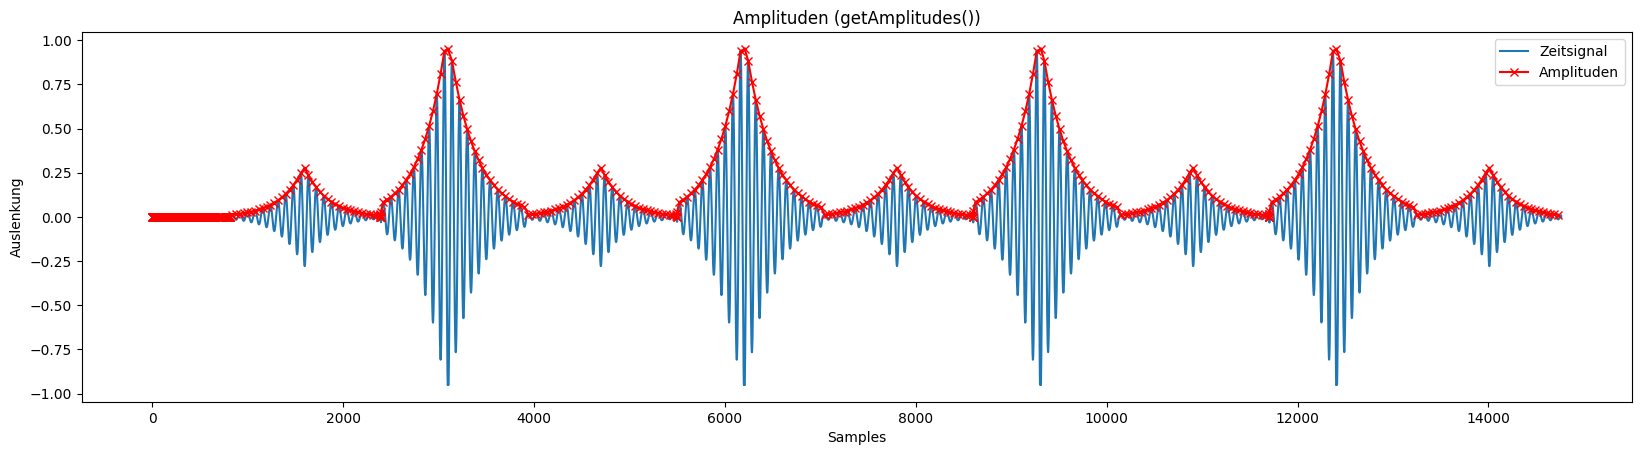

In [3]:
plt.figure(4000)
getAmplitudes(audio_arr=audio_arr, sr=sr)


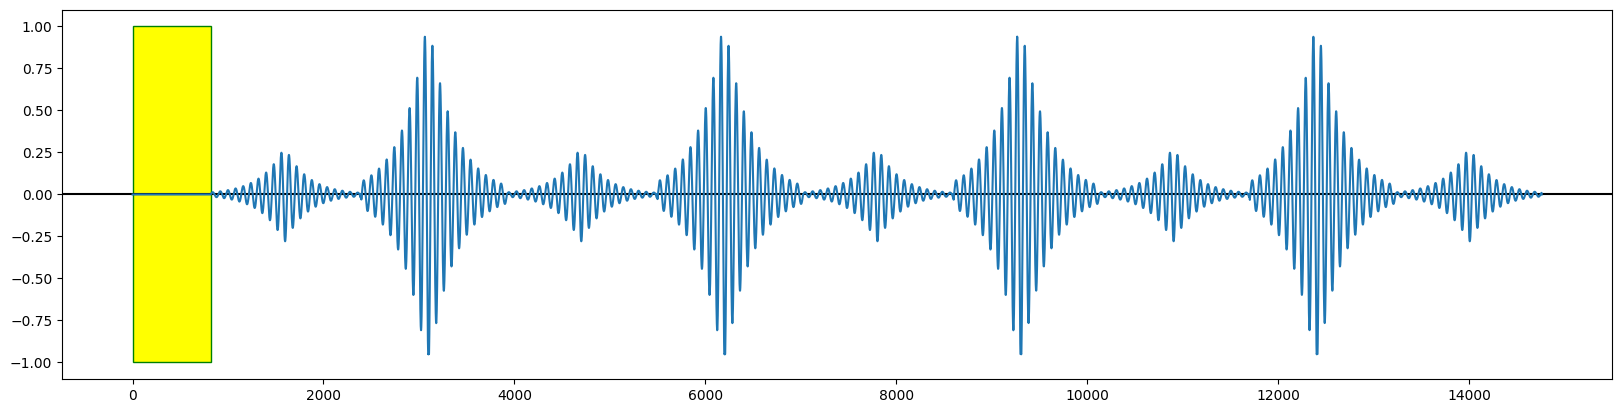

In [4]:
breaks_list = findBreaks(audio_arr=audio_arr, sr=sr) #findet Pausen in Audio Array

# Amplituden berechnen

Die eigentlichen Amplituden werden mittels getAmplitudes() gefunden

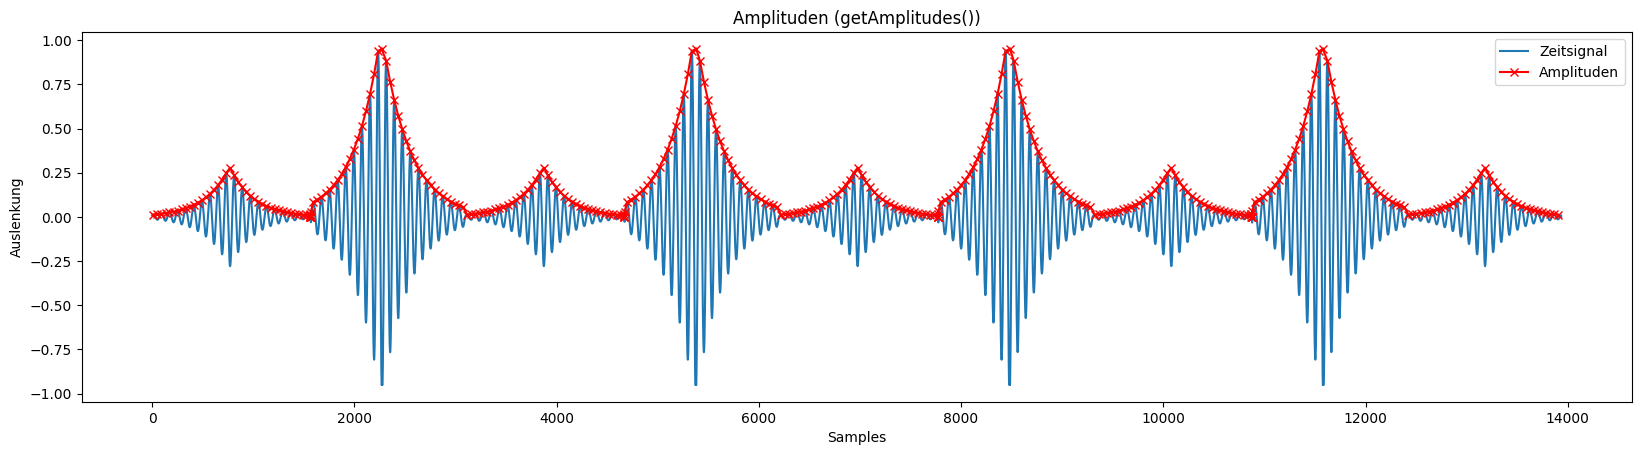

In [5]:
audio_arr_list = splitAudioArrAtBreaks(audio_arr=audio_arr, breaksList=breaks_list)
amplitudes = []
if audio_arr_list is not None:
  for audio in audio_arr_list:
    amplitudes.append(getAmplitudes(audio,sr=sr))

Die Amplituden werden interpoliert (interpolate()), so dass eine kontinuierlicher Graph entsteht, aus dem das RMS gebildet werden kann.

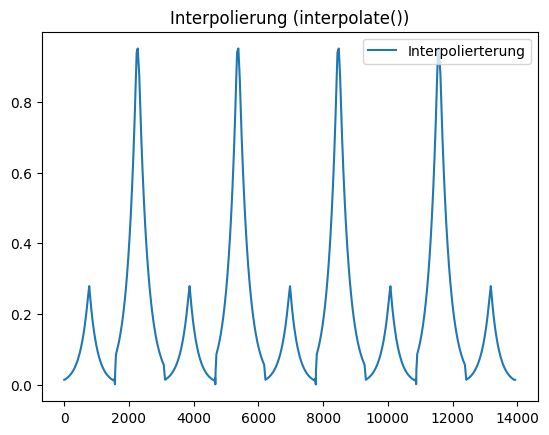

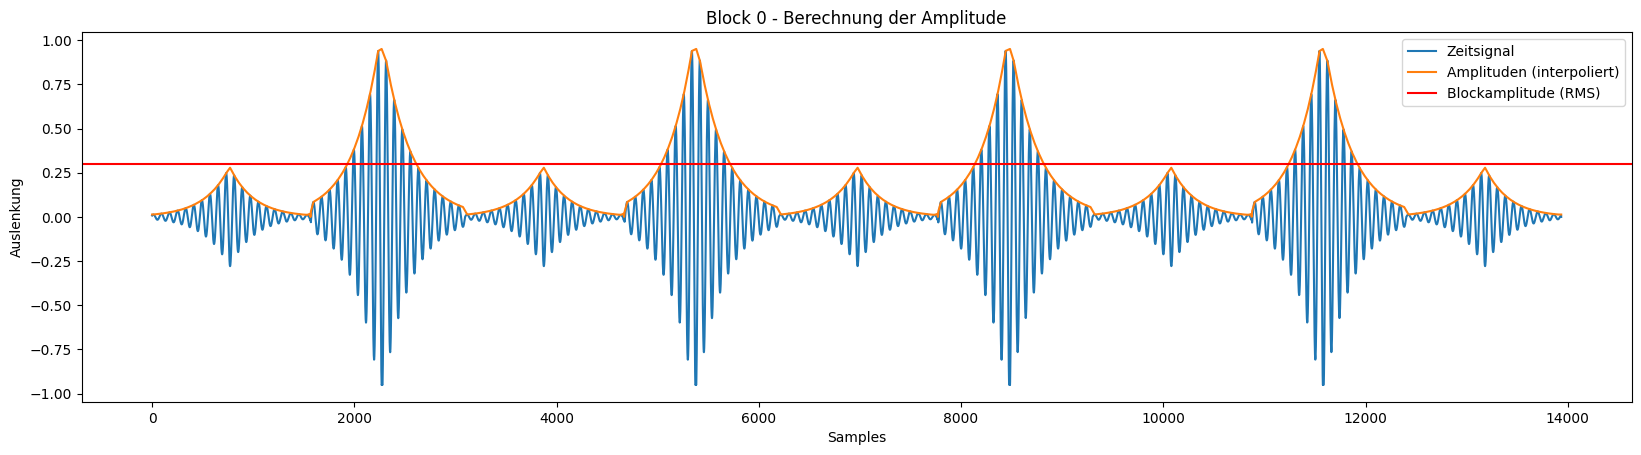

In [6]:
for i in range(0,len(amplitudes)):
    if amplitudes[i] is not None and len(amplitudes[i]) > 0:
        interpolated = interpolate(amplitudes[i], len(audio_arr_list[i]))
        arms = rms(interpolated)
        plt.figure(1000 + i).set_figwidth(20)
        plt.plot(audio_arr_list[i], label="Zeitsignal")
        plt.plot(interpolated, label="Amplituden (interpoliert)")
        plt.axhline(arms, color="red", label = "Blockamplitude (RMS)")
        plt.xlabel("Samples")
        plt.ylabel("Auslenkung")
        plt.title("Block " + str(i) + " - Berechnung der Amplitude")
        plt.legend()


# Frequenzerkennung

c:\Users\Domin\anaconda3\envs\WtT\Lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


tensorflow: 2.16.1



tensorflow: 2.16.1
Frequenz:  199.23505


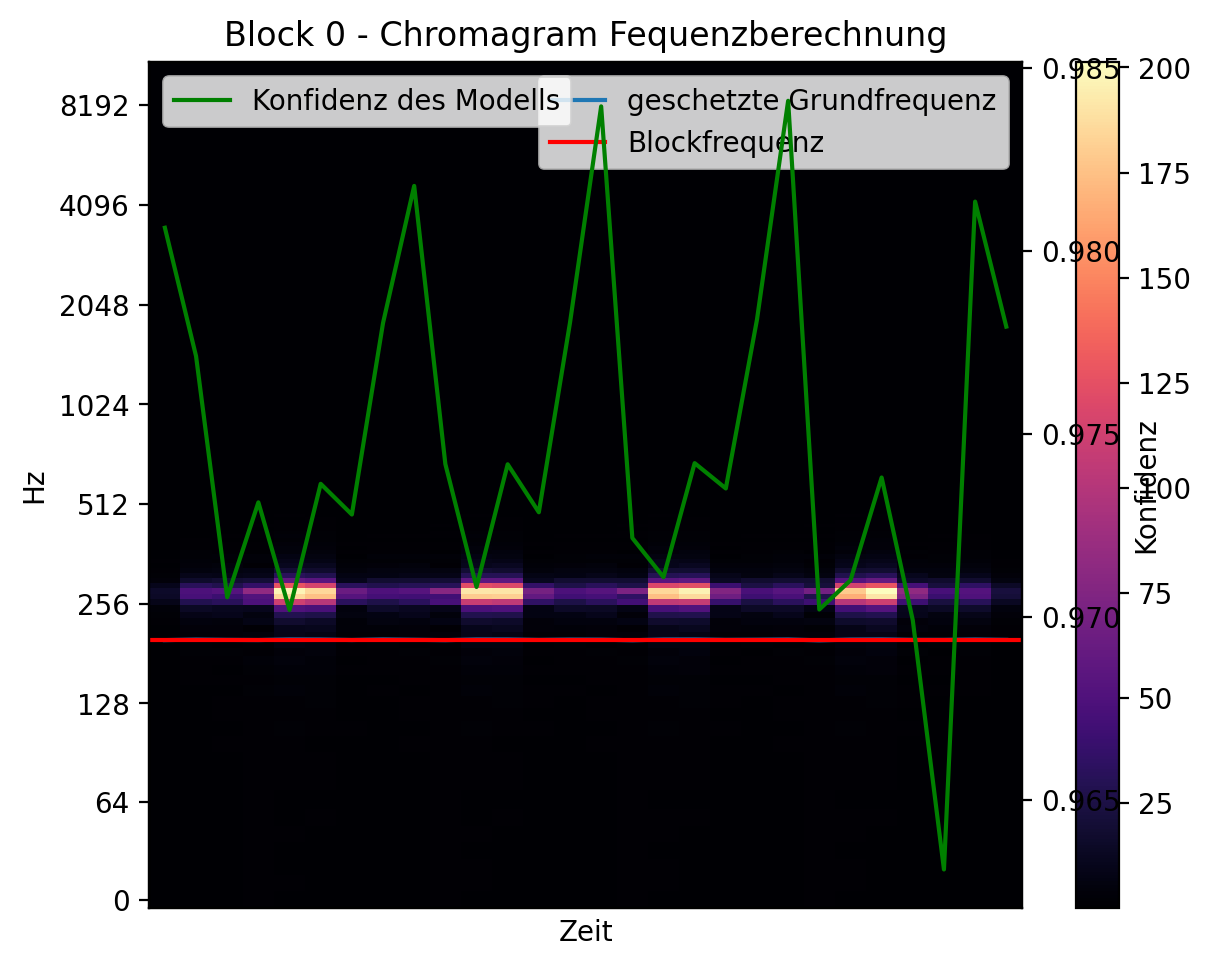

In [7]:
from aiBasefrequency import *
import librosa

i = 0
for audio in audio_arr_list:
    if len(audio) > 1:
        if amplitudes[i] is not None and len(amplitudes[i]) > 0:
            plt.figure(2000 + i)
            plt.title("Block " + str(i) + " - Chromagram Fequenzberechnung")

            frequency,uncertainty = getFrequencies(audio,sr=sr)
            confidence = 1 - uncertainty

            frequency = outputTooHz(frequency)
        
            plt.plot(frequency, label="geschetzte Grundfrequenz")
            frequency = rms(frequency)
            print("Frequenz: ", frequency)

            S = numpy.abs(librosa.stft(audio))

            img = librosa.display.specshow(S, y_axis='log')
            plt.colorbar()
            plt.tight_layout()
            plt.axhline(frequency, color="red", label = "Blockfrequenz")
            plt.legend()
            plt.xlabel("Zeit")
            plt.twinx()
            plt.plot(confidence, color="green", label="Konfidenz des Modells")
            plt.ylabel("Konfidenz")
            plt.legend()
    
            i += 1

    

# Blöcke über Amplitude

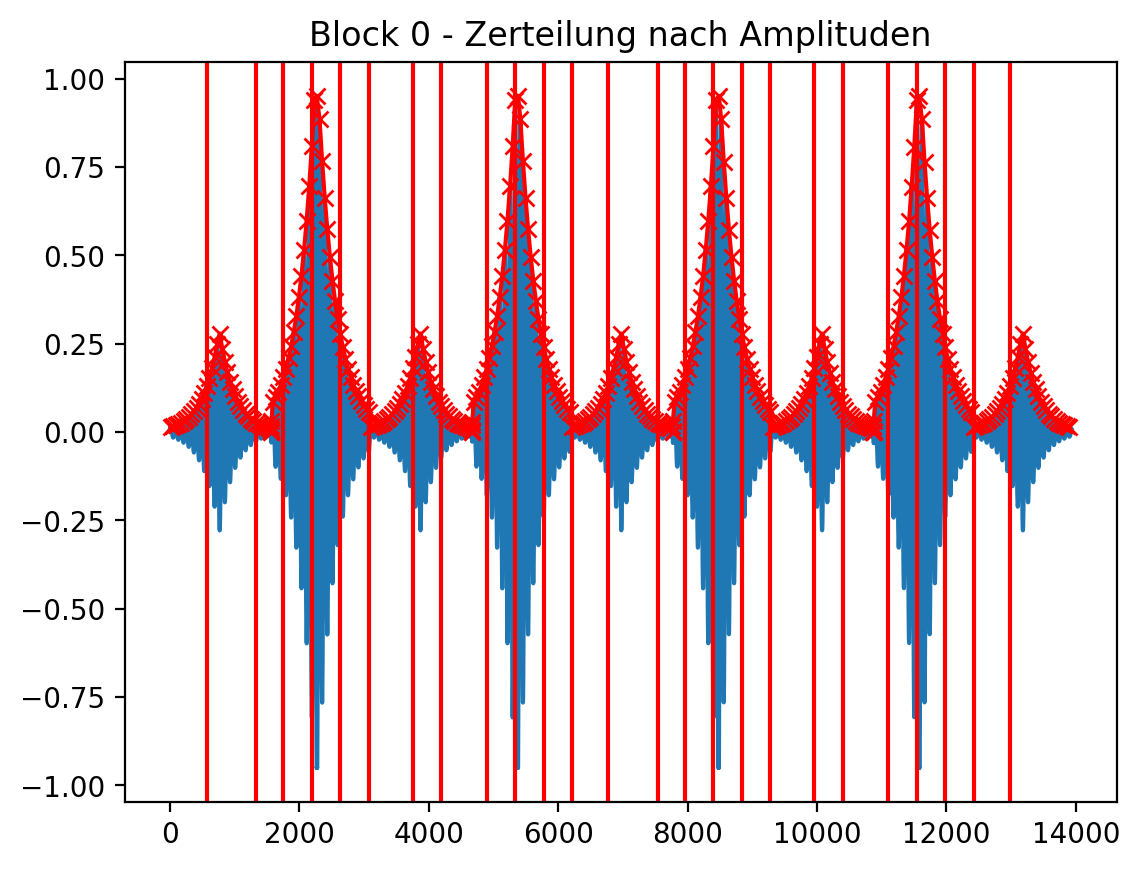

In [8]:

for i in range(len(amplitudes)):
    signal_blocks, indices= simpleSplitByAmplitude(audio_arr=audio_arr_list[i], amplitudes=amplitudes[i], sr=sr)
    plt.figure()
    plt.title("Block " + str(i) + " - Zerteilung nach Amplituden")
    plt.plot(audio_arr_list[i])
    plt.plot([row[0] for row in amplitudes[i]],[row[1] for row in amplitudes[i]], marker="x", color="red")
    for index in indices:
        plt.axvline(x=index, color="red")


In [9]:
from hlabs import *

for i in range(len(amplitudes)):
    if amplitudes[i] is not None and len(amplitudes[i]) > 0:

        signal_blocks, indices= simpleBlockByAmplitude(audio_arr=audio_arr_list[i], amplitudes=amplitudes[i], sr=sr)

        hBlocks = [HlabsBlock(type=HlabsType.SINUS, start_time=0, end_time=indices[0],full_sound_array=audio_arr_list[i])]

        for j in range(0,len(indices)-1):
            hBlocks.append(HlabsBlock(type=HlabsType.SINUS, start_time=indices[j], end_time=indices[j+1],full_sound_array=audio_arr_list[i]))

        hBlocks.append(HlabsBlock(type=HlabsType.SINUS, start_time=indices[-1], end_time=len(audio_arr_list[i]),full_sound_array=audio_arr_list[i]))


TypeError: '>=' not supported between instances of 'int' and 'list'